In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
# goal: automate reading in of transienttables in a directory / from directories
# problem: transienttables or named same, no differentiation in skymaps --> might be sensible to add skymap name to file name? or can there be several healpix maps per table
# would maybe make sense to let jobfile make own directory for skymap named by skymap

In [2]:
file_dir = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-healpix/test2/"

plot_dir = os.path.join(file_dir, "visualisePlots")

try:
    os.makedirs(plot_dir)
except:
    pass

table_name = "TransientTable.csv"
os.listdir(file_dir)

transient_names = []

data_df = pd.DataFrame()

for transient in os.listdir(file_dir):
    tableFile_dir = os.path.join(file_dir, transient, table_name)
    if os.path.isfile(tableFile_dir):
        table_df = pd.read_csv(tableFile_dir, sep=";")
        transient_names.append(table_df["Healpix map"].iloc[0])

        #pd.read_csv(tableFile_dir, sep=";")

        data_df = pd.concat([data_df, table_df])

print(len(data_df))

try:
    possibleSelectKeys = data_df.keys()
except:
    print("No transient tables found.")

transient_names.extend(["ALL", "FOLLOWUP"])
print(transient_names)


440
['S190426c.fits.gz,1', 'S190901ap.fits.gz,0', 'S190910d.fits.gz,0', 'S190910h.fits.gz,0', 'S190930t.fits.gz,0', 'S191213g.fits.gz', 'S200115j.fits.gz,0', 'ALL', 'FOLLOWUP']


In [3]:
kasliwal_candidates_file = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-healpix/test2/compareKasliwal_confirmed.ods"
kasliwal_candidates = pd.read_excel(kasliwal_candidates_file)
kasliwal_followup = kasliwal_candidates[kasliwal_candidates["FOUND O3?"] == True]["ztf_id"]

print(len(kasliwal_followup))

58


In [15]:
def HistPlots(key_ind="Kilonovaness", 
              filterKey="Kilonovaness", 
              filterMinValue=4, 
              filterMaxValue=40, 
              bins=15, 
              saveFig=False,
              displayTransients=[],
              density=False):
    #key_ind = "Sigma difference distances"
    #bins = 15

    printKeys = True

    fig, ax = plt.subplots(figsize=(6, 5))

    for  transient in displayTransients:

        #if not transient in displayTransients:
            #continue

        #tableFile_dir = os.path.join(file_dir, transient, table_name)
        
        #print(tableFile_dir)

        if transient=="ALL":
            df = data_df
            legend_text = "\n".join(transient_names[:-2])
        elif transient=="FOLLOWUP":
            if "ALL" in displayTransients:
                follow_check_names = transient_names
                #print(follow_check_names)
            else:
                follow_check_names = displayTransients
            df = data_df[np.logical_and(data_df["ztf_id"].isin(kasliwal_followup), data_df["Healpix map"].isin(follow_check_names))]
            legend_text = transient
        else:
            df = data_df[data_df["Healpix map"] == transient]
            legend_text = transient

        #try: 
            #df = pd.read_csv(tableFile_dir, sep=";")
        #except:
            #print("No TransientTable.csv")
            #continue
        if (type(key_ind) == int):
            key = df.keys()[key_ind]
        else:
            key = key_ind

        if printKeys:
            #print(df.keys())
            printKeys = False

        df_filtered = df[np.logical_and(df[filterKey] > filterMinValue, df[filterKey] < filterMaxValue)]

        plt.hist(df_filtered[key], bins=bins, label="{} - Counts = {}".format(legend_text, df_filtered.shape[0]), alpha=0.5, density=density)

    if "ALL" in displayTransients:
        title_names = transient_names
    else:
        title_names = displayTransients
    plt.title(f"Filter: {filterMinValue} < {filterKey} < {filterMaxValue}")
    plt.xlabel(key)
    plt.ylabel("Counts")
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    plt.tight_layout()

    if saveFig:
        saveName = "HIST_"
        print(displayTransients)
        saveName +=  "_".join(displayTransients) + "_" + key + "_filter-" + filterKey + str(filterMinValue) + "-" + str(filterMaxValue)
        saveName = saveName.replace(".", "_")
        saveName = saveName.replace(" ", "_")
        saveName = saveName.replace(":", "-")
        saveName = saveName.replace(",", "_")
        plt.savefig(os.path.join(plot_dir, saveName + ".pdf"), dpi=72, bbox_inches="tight")


In [5]:
def DependencePlots(key_ind_A="Kilonovaness", 
                    key_ind_B="Kilonovaness", 
                    filterKey="Kilonovaness", 
                    filterMinValue=4, 
                    filterMaxValue=40, 
                    displayEventNames=False, 
                    fontsize=10, 
                    saveFig=False,
                    displayTransients=[]):
    #key_ind = "Sigma difference distances"

    fig, ax = plt.subplots(figsize=(9, 5))

    for  transient in transient_names:

        if not transient in displayTransients:
            continue

        #tableFile_dir = os.path.join(file_dir, transient, table_name)
        #df = pd.read_csv(tableFile_dir, sep=";")

        if transient=="ALL":
            df = data_df
            legend_text = "\n".join(transient_names[:-2])
        elif transient=="FOLLOWUP":
            if "ALL" in displayTransients:
                follow_check_names = transient_names
            else:
                follow_check_names = displayTransients
            df = data_df[np.logical_and(data_df["ztf_id"].isin(kasliwal_followup), data_df["Healpix map"].isin(follow_check_names))]
            legend_text = transient
        else:
            df = data_df[data_df["Healpix map"] == transient]
            legend_text = transient

        if (type(key_ind_A) == int):
            key_A = df.keys()[key_ind_A]
        else:
            key_A = key_ind_A

        if (type(key_ind_B) == int):
            key_B = df.keys()[key_ind_B]
        else:
            key_B = key_ind_B

        #if printKeys:
            #print(df.keys())
            #printKeys = False
        
        df_filtered = df[np.logical_and(df[filterKey] > filterMinValue, df[filterKey] < filterMaxValue)]

        #print(len(df_filtered["ztf_id"]))
        #print(df_filtered.size)

        plt.scatter(df_filtered[key_A], df_filtered[key_B], label="{} - Counts = {}".format(legend_text, df_filtered.shape[0]), edgecolor=next(ax._get_lines.prop_cycler)['color'], facecolor="None")

        if displayEventNames and df_filtered.size>0:

            for i in range(len(df_filtered)):
                #print(i)
                #print(df_filtered.iloc[i]["ztf_id"])
                plt.annotate(df_filtered["ztf_id"].iloc[i], 
                            (df_filtered[key_A].iloc[i], df_filtered[key_B].iloc[i]),
                            textcoords="offset points", # how to position the text
                            xytext=(0,10), # distance from text to points (x,y)
                            ha='center', # horizontal alignment can be left, right or center)
                            color="grey",
                            fontsize=fontsize)

    plt.title(f"Filter: {filterMinValue} < {filterKey} < {filterMaxValue}")
    plt.xlabel(key_A)
    plt.ylabel(key_B)
    #plt.ylabel("Counts")
    if (key_A == filterKey or key_B == filterKey):
        plt.xlim((filterMinValue * 0.7, 1.3 * filterMaxValue))
    
    #plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

    if saveFig:
        saveName = "RELATION_"
        saveName += "_".join(transient_names) + "_" + key_A + "_" + key_B + "_filter-" + filterKey + str(filterMinValue) + "-" + str(filterMaxValue)
        saveName = saveName.replace(".", "_")
        saveName = saveName.replace(" ", "_")
        saveName = saveName.replace(":", "-")
        saveName = saveName.replace(",", "_")
        plt.savefig(os.path.join(plot_dir, saveName + ".pdf"), dpi=72, bbox_inches="tight")


In [6]:
key_ind_A = widgets.Select(
    options=possibleSelectKeys,
    value=possibleSelectKeys[0],
    # rows=10,
    description='X-axis',
    disabled=False
)

key_ind = widgets.Select(
    options=possibleSelectKeys,
    value=possibleSelectKeys[0],
    # rows=10,
    description='X-axis',
    disabled=False
)

key_ind_B = widgets.Select(
    options=possibleSelectKeys,
    value=possibleSelectKeys[0],
    # rows=10,
    description='Y-axis',
    disabled=False
)

filter_key = widgets.Select(
    options=possibleSelectKeys,
    value=possibleSelectKeys[0],
    # rows=10,
    description='filter-key',
    disabled=False
)

transient_select = widgets.SelectMultiple(options=transient_names, value=transient_names)

interactive(children=(Select(description='X-axis', index=7, options=('Unnamed: 0', 'Ampel z', 'Ampel z (precis…

<function __main__.HistPlots(key_ind='Kilonovaness', filterKey='Kilonovaness', filterMinValue=4, filterMaxValue=40, bins=15, saveFig=False, displayTransients=[], density=False)>

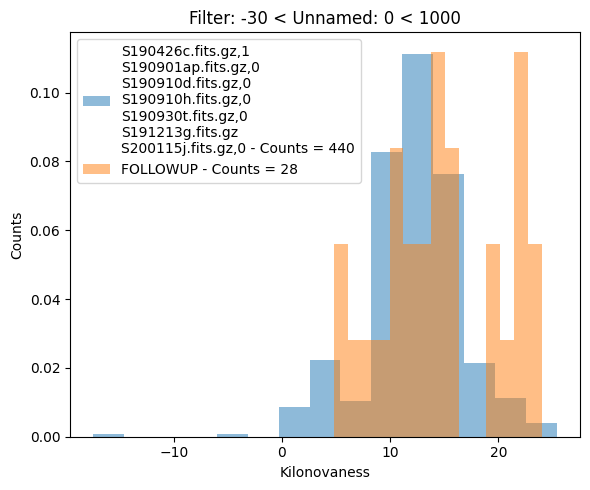

In [16]:
interact(HistPlots, key_ind=key_ind, filterKey=filter_key, filterMinValue=(-30, 30), filterMaxValue=(0, 1000), bins=(0, 45), displayTransients=transient_select)

In [13]:
interact(DependencePlots, 
         key_ind_A=key_ind_A, 
         key_ind_B=key_ind_B, 
         filterKey=filter_key, 
         filterMinValue=(-30, 30), 
         filterMaxValue=(0, 1000, 0.1), 
         displayEventName=True,
         fontsize=(0,15),
         displayTransients=transient_select)

interactive(children=(Select(description='X-axis', index=7, options=('Unnamed: 0', 'Ampel z', 'Ampel z (precis…

<function __main__.DependencePlots(key_ind_A='Kilonovaness', key_ind_B='Kilonovaness', filterKey='Kilonovaness', filterMinValue=4, filterMaxValue=40, displayEventNames=False, fontsize=10, saveFig=False, displayTransients=[])>

In [29]:
def CountingPlots(key_ind="Kilonovaness", 
                    minCount=0,
                    maxCount=30,
                    stepCount=5,
                    filterKey="Kilonovaness", 
                    filterMinValue=4, 
                    filterMaxValue=40, 
                    saveFig=False,
                    displayTransients=[]):
    #key_ind = "Sigma difference distances"

    countingRange = np.arange(minCount, maxCount, stepCount)

    for  transient in transient_names:

        if not transient in displayTransients:
            continue

        tableFile_dir = os.path.join(file_dir, transient, table_name)
        df = pd.read_csv(tableFile_dir, sep=";")

        df["Kilonovaness_wo_distance"] = df["Kilonovaness"] - df["Dist-kilonovaness"]

        if (type(key_ind) == int):
            key = df.keys()[key_ind]
        else:
            key = key_ind
       
        df_filtered = df[np.logical_and(df[filterKey] > filterMinValue, df[filterKey] < filterMaxValue)]

        count_array = [np.count_nonzero(df_filtered[key] > minValue) for minValue in countingRange]

        #print(df_filtered["ztf_id"])
        #print(df_filtered.size)

        plt.scatter(countingRange, count_array, label="{} - Total Counts = {}".format(transient, df_filtered.shape[0]), alpha=0.7)

    plt.title(f"Filter: {filterMinValue} < {filterKey} < {filterMaxValue}")
    plt.xlabel(key + " more than")
    plt.ylabel("Counts")
    #plt.ylabel("Counts")
    plt.tight_layout()
    plt.legend()

    if saveFig:
        saveName = "COUNTSABOVE_"
        saveName += "_".join(transient_names) + "_" + key + "_filter-" + filterKey + str(filterMinValue) + "-" + str(filterMaxValue)
        saveName = saveName.replace(".", "_")
        saveName = saveName.replace(" ", "_")
        saveName = saveName.replace(":", "-")
        saveName = saveName.replace(",", "_")
        plt.savefig(os.path.join(plot_dir, saveName + ".pdf"), dpi=72, bbox_inches="tight")


In [30]:
interact(CountingPlots, 
         key_ind=key_ind, 
         filterKey=filter_key, 
         filterMinValue=(-30, 30), 
         filterMaxValue=(0, 1000, 0.1), 
         displayTransients=transient_select)

interactive(children=(Select(description='X-axis', index=16, options=('Unnamed: 0', 'Ampel z', 'Ampel z (preci…

<function __main__.CountingPlots(key_ind='Kilonovaness', minCount=0, maxCount=30, stepCount=5, filterKey='Kilonovaness', filterMinValue=4, filterMaxValue=40, saveFig=False, displayTransients=[])>

In [15]:
range = np.arange(0,10,1)

print([i for i in range])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
